In [85]:
from mostlyai import MostlyAI
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets

Generated_path = '/Users/paulmagos/Documents/TSGen/Datasets/GeneratedDatasets/AirQuality/'
TeachForcing_path = '/Users/paulmagos/Documents/TSGen/Datasets/TeachForcingDatasets/'

In [86]:
df_AirQuality = AirQuality(impute_nans=True, small=True)
df_AirQuality = df_AirQuality.dataframe()[-1000:].reset_index(drop=True)

df_AirQuality['gen'] = 1

df_AirQuality.columns = df_AirQuality.columns.droplevel('channels')

In [87]:
# syn_AirQuality = pd.read_csv(f'{Generated_path}synteticAirQualityMostlyAI.csv')
syn_AirQuality_dopple = pd.read_csv(f'{Generated_path}synteticAirQualityDoppleGANger.csv')
syn_AirQuality_GTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTM.csv')
syn_AirQuality_GTLSTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTLSTM.csv')
syn_AirQuality_GRGN = pd.read_csv(f'{Generated_path}synteticAirQualityGRGNTanh.csv')
syn_AirQuality_PAR = pd.read_csv(f'{Generated_path}SynteticAirQualityPam.csv')

# syn_AirQuality.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality.columns]
# syn_AirQuality_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality_dopple.columns]

syn_AirQuality_GRGN['gen'] = 0
syn_AirQuality_GTLSTM['gen'] = 0
syn_AirQuality_GTM['gen'] = 0
syn_AirQuality_PAR['gen'] = 0
syn_AirQuality_dopple['gen'] = 0

In [88]:
results_df = pd.DataFrame(columns=['dataset', 'model', 'mean_difference',
 'variance_difference',
 'skewness_difference',
 'kurtosis_difference',
 'ks_test',
 'ks_test_p_value',
 'wasserstein_distance',
 'js_divergence',
 'correlation_difference',
 'mmd_linear',
 'mmd_rbf',
 'model_accuracy',
 'model_accuracy_on_Gen',
 'model_accuracy_train_on_both',
 'model_accuracy_train_on_both_Gen'])

In [89]:
df_AirQuality.columns = [str(col) for col in df_AirQuality.columns]
syn_AirQuality_GTM.columns = [str(col) for col in syn_AirQuality_GTM.columns]
syn_AirQuality_dopple.columns = [str(col) for col in syn_AirQuality_dopple.columns]
syn_AirQuality_GTLSTM.columns = [str(col) for col in syn_AirQuality_GTLSTM.columns]
syn_AirQuality_GRGN.columns =  [str(col) for col in syn_AirQuality_GRGN.columns]
syn_AirQuality_PAR.columns =  [str(col) for col in syn_AirQuality_PAR.columns]

In [90]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_dopple, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "DoppleGANger"
res = pd.DataFrame(out, ["AirQuality DoppleGANger"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [91]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_PAR, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "PAR"
res = pd.DataFrame(out, ["AirQuality PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [92]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTM"
res = pd.DataFrame(out, ["AirQuality GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [93]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTLSTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["AirQuality GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [94]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GRGN, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["AirQuality GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: divide by zero encountered in log
  kl_div = split_preds * np.log(split_preds / marginal)
/Users/paulmagos/Documents/TSGen/Notebooks/Metrics.py:147: RuntimeWarning: invalid value encountered in multiply
  kl_div = split_preds * np.log(split_preds / marginal)


In [95]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()

In [96]:
results_df_AirQuality = results_df[results_df['dataset'] == 'AirQuality'].sort_values(by=['tmp'], ascending=False).reset_index(drop=True)
results_df_AirQuality

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,AirQuality,PAR,1.796664,1861.216464,1.021225,2.093343,0.330306,7.225377e-30,25.127870,0.610495,...,0.0,0.932,0.999000,0.025647,0.7644,0.874501,0.874891,-0.020641,3.865046e-01,0.00039
1,AirQuality,DoppleGANger,84.362828,1097.075034,1.014761,6.820650,0.688083,6.592041e-119,84.362828,0.368729,...,0.0,1.000,0.997000,0.771152,0.7644,0.000000,0.000000,43.616625,9.313962e-187,0.00000
2,AirQuality,GTM,23.858332,1793.969286,1.054913,1.905848,0.407560,3.671746e-17,31.813923,0.545054,...,0.0,0.878,0.995005,0.044749,0.7644,0.000000,0.000000,-13.434402,2.297392e-02,0.00000
3,AirQuality,GTLSTM,8.270348,2451.896393,26.722929,770.142724,0.561871,2.839769e-114,38.851615,0.805118,...,0.0,1.000,0.997003,0.460534,0.7644,0.000000,0.000000,0.828688,8.253090e-02,0.00000
4,AirQuality,GRGN,28.902833,1053.751553,0.585991,1.595580,0.262250,4.761758e-12,29.934311,0.465852,...,0.0,0.984,0.993000,0.136110,0.7644,0.000000,0.000000,13.886087,7.503851e-09,0.00000


In [97]:
results_df = results_df.sort_values(by=['correlation_gen'], ascending=True).reset_index(drop=True)
results_df

,dataset,model,mean_difference,variance_difference,skewness_difference,kurtosis_difference,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,...,model_accuracy_on_Gen,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,correlation_gen,correlation_original,inception_score_mean,inception_score_std,t_stat,t_stat_p_value,tmp
0,AirQuality,PAR,1.796664,1861.216464,1.021225,2.093343,0.330306,7.225377e-30,25.127870,0.610495,...,0.0,0.932,0.999000,0.025647,0.7644,0.874501,0.874891,-0.020641,3.865046e-01,0.00039
1,AirQuality,GTM,23.858332,1793.969286,1.054913,1.905848,0.407560,3.671746e-17,31.813923,0.545054,...,0.0,0.878,0.995005,0.044749,0.7644,0.000000,0.000000,-13.434402,2.297392e-02,0.00000
2,AirQuality,GRGN,28.902833,1053.751553,0.585991,1.595580,0.262250,4.761758e-12,29.934311,0.465852,...,0.0,0.984,0.993000,0.136110,0.7644,0.000000,0.000000,13.886087,7.503851e-09,0.00000
3,AirQuality,GTLSTM,8.270348,2451.896393,26.722929,770.142724,0.561871,2.839769e-114,38.851615,0.805118,...,0.0,1.000,0.997003,0.460534,0.7644,0.000000,0.000000,0.828688,8.253090e-02,0.00000
4,AirQuality,DoppleGANger,84.362828,1097.075034,1.014761,6.820650,0.688083,6.592041e-119,84.362828,0.368729,...,0.0,1.000,0.997000,0.771152,0.7644,0.000000,0.000000,43.616625,9.313962e-187,0.00000


In [98]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean_difference', 'variance_difference', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy', 'inception_score_mean']:
    best_grgn_models[col + '_rank'] = best_grgn_models[col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models


,dataset,model,mean_difference,variance_difference,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy,inception_score_mean,mean_difference_rank,variance_difference_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_rank,inception_score_mean_rank,total_rank
0,AirQuality,GRGN,28.902833,1053.751553,0.262250,29.934311,0.465852,0.628289,0.0,0.000000,4.0,1.0,1.0,2.0,2.0,3.0,3.0,3.5,19.5
1,AirQuality,PAR,1.796664,1861.216464,0.330306,25.127870,0.610495,0.738753,0.0,0.874501,1.0,4.0,2.0,1.0,4.0,5.0,3.0,1.0,21.0
2,AirQuality,GTM,23.858332,1793.969286,0.407560,31.813923,0.545054,0.719651,0.0,0.000000,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.5,25.5
3,AirQuality,DoppleGANger,84.362828,1097.075034,0.688083,84.362828,0.368729,0.148697,0.0,0.000000,5.0,2.0,5.0,5.0,1.0,1.0,3.0,3.5,25.5
4,AirQuality,GTLSTM,8.270348,2451.896393,0.561871,38.851615,0.805118,0.541505,0.0,0.000000,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.5,28.5


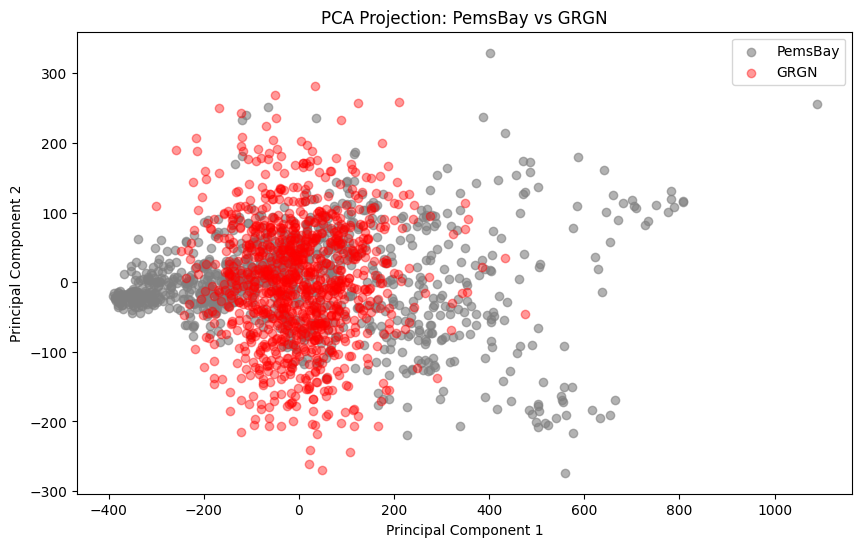

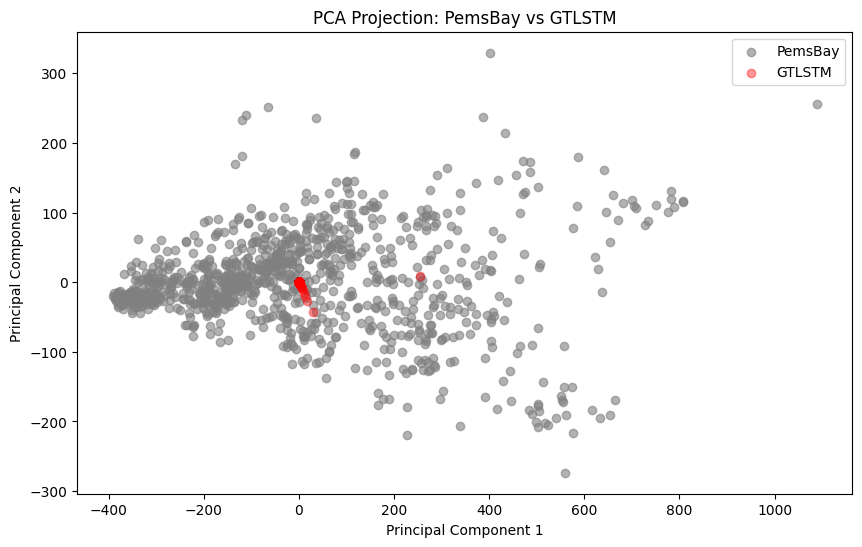

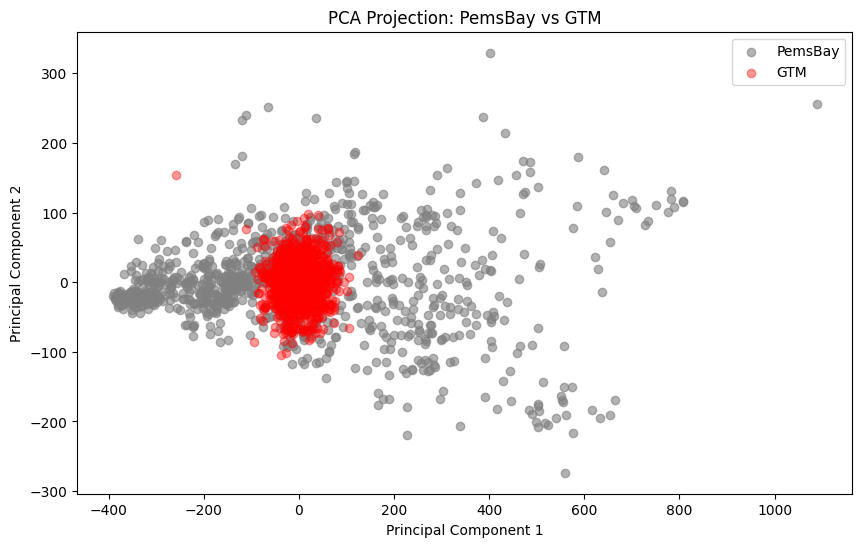

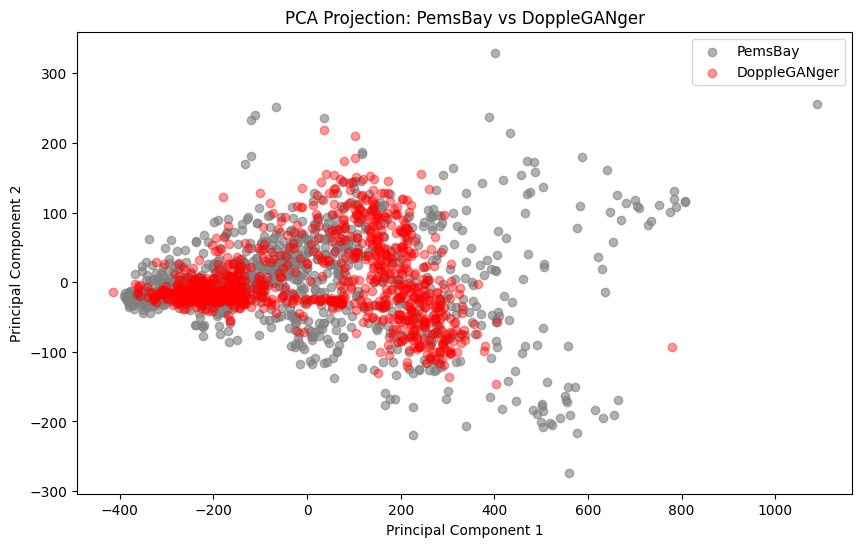

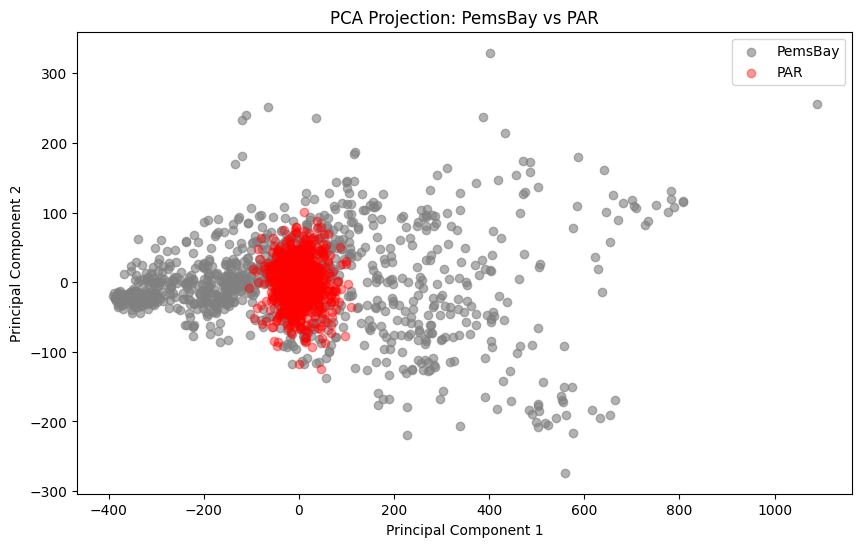

In [99]:
from VisualEval import plot_pca

plot_pca(df_AirQuality, syn_AirQuality_GRGN, 'PemsBay', 'GRGN')
plot_pca(df_AirQuality, syn_AirQuality_GTLSTM, 'PemsBay', 'GTLSTM')
plot_pca(df_AirQuality, syn_AirQuality_GTM, 'PemsBay', 'GTM')
plot_pca(df_AirQuality, syn_AirQuality_dopple, 'PemsBay', 'DoppleGANger')
plot_pca(df_AirQuality, syn_AirQuality_PAR, 'PemsBay', 'PAR')

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


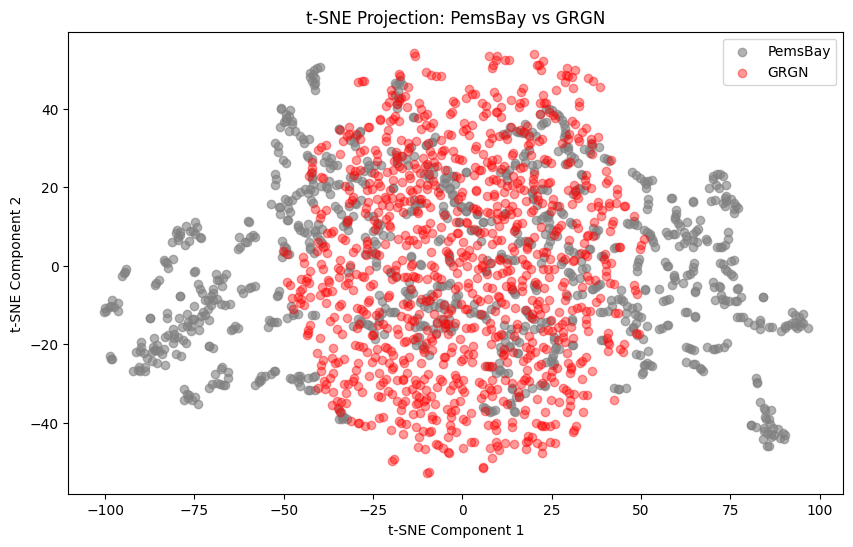

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


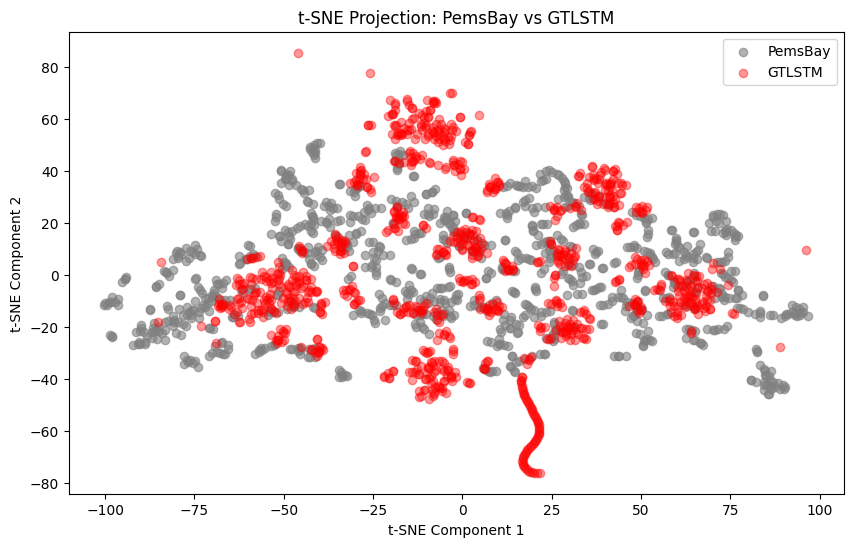

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


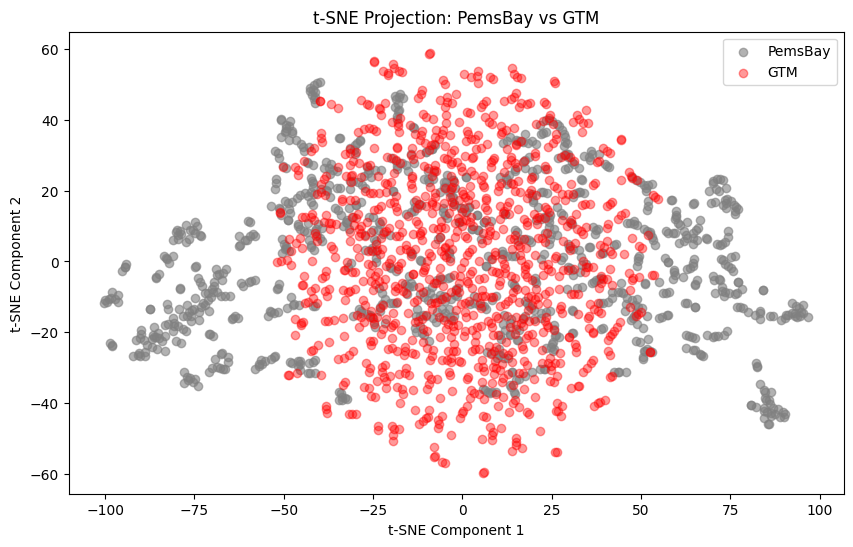

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


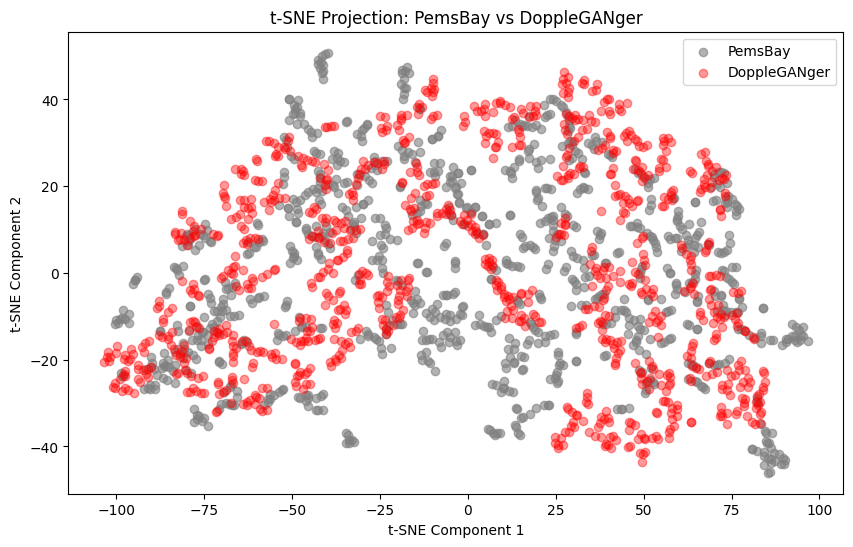

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


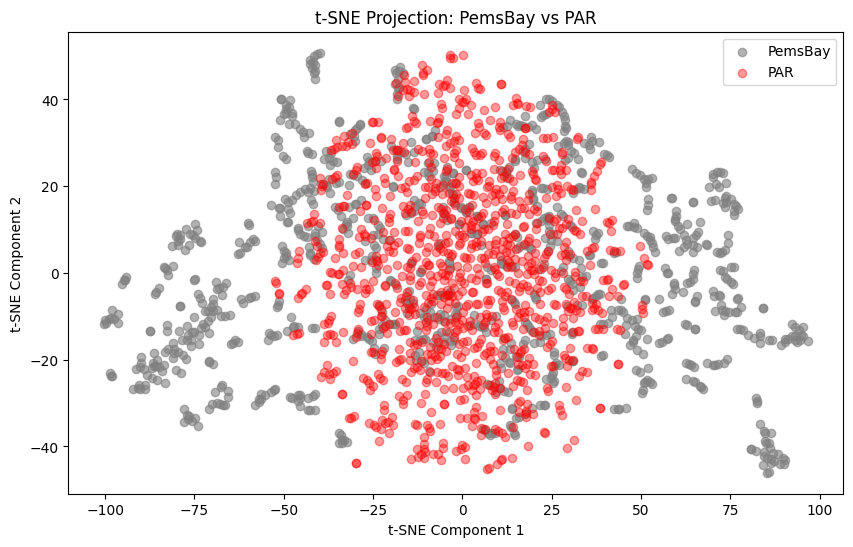

In [100]:
from VisualEval import plot_tsne

plot_tsne(df_AirQuality, syn_AirQuality_GRGN, 'PemsBay', 'GRGN')
plot_tsne(df_AirQuality, syn_AirQuality_GTLSTM, 'PemsBay', 'GTLSTM')
plot_tsne(df_AirQuality, syn_AirQuality_GTM, 'PemsBay', 'GTM')
plot_tsne(df_AirQuality, syn_AirQuality_dopple, 'PemsBay', 'DoppleGANger')
plot_tsne(df_AirQuality, syn_AirQuality_PAR, 'PemsBay', 'PAR')

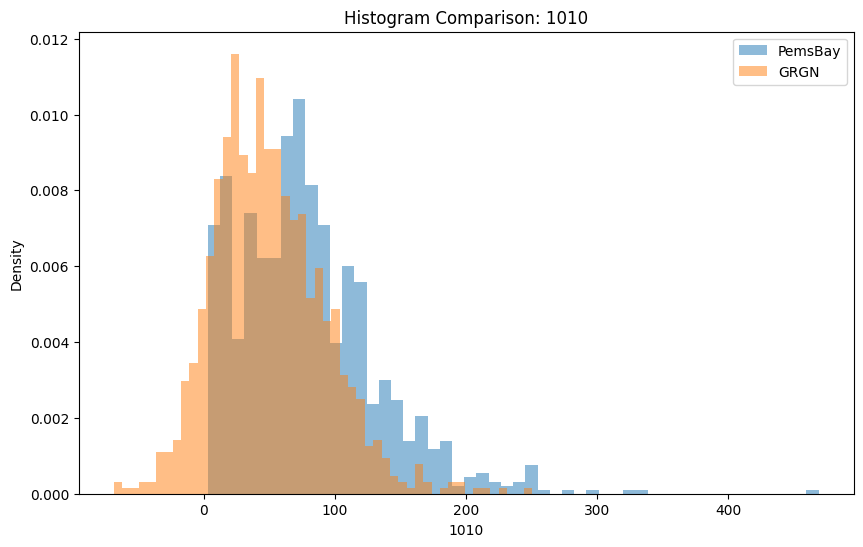

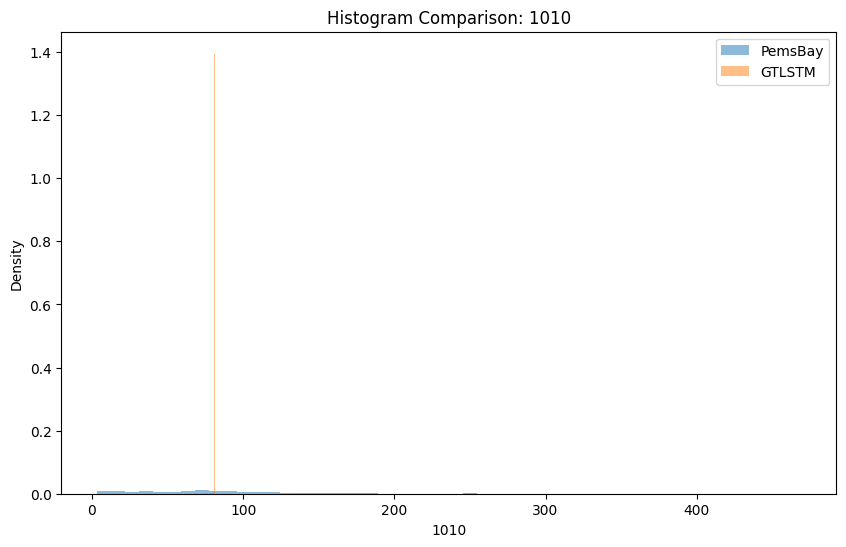

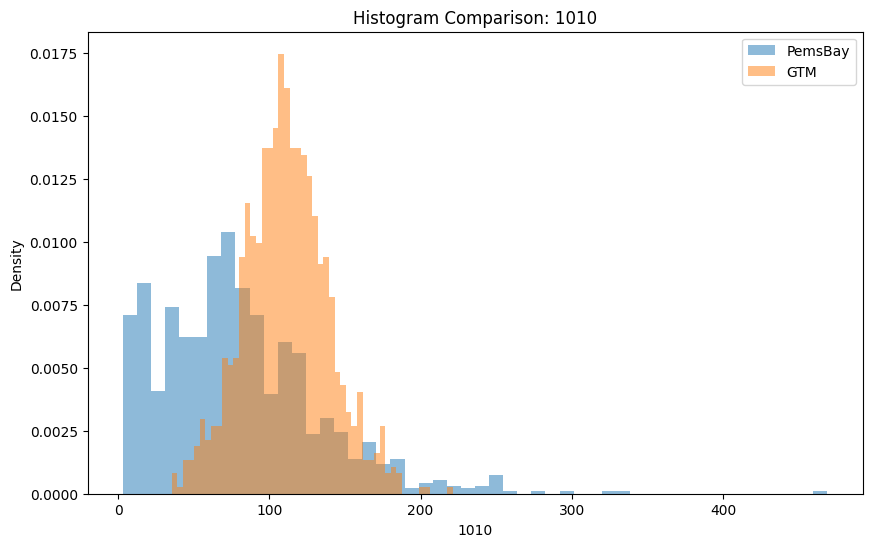

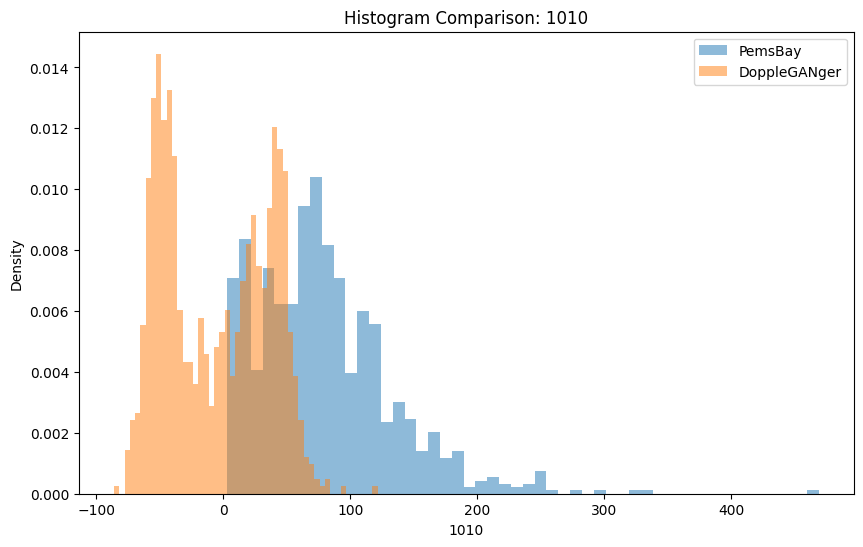

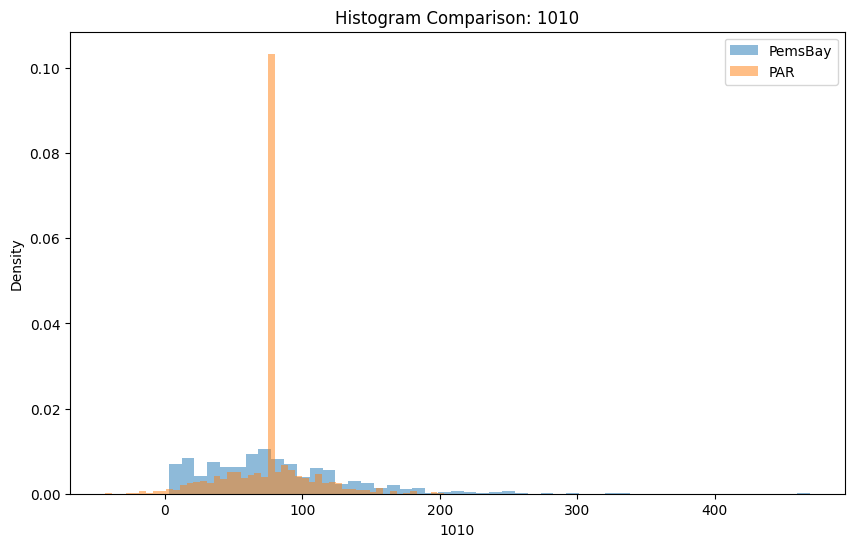

In [101]:
from VisualEval import plot_histograms

plot_histograms(df_AirQuality, syn_AirQuality_GRGN, '1010', 'PemsBay', 'GRGN')
plot_histograms(df_AirQuality, syn_AirQuality_GTLSTM, '1010', 'PemsBay', 'GTLSTM')
plot_histograms(df_AirQuality, syn_AirQuality_GTM, '1010', 'PemsBay', 'GTM')
plot_histograms(df_AirQuality, syn_AirQuality_dopple, '1010', 'PemsBay', 'DoppleGANger')
plot_histograms(df_AirQuality, syn_AirQuality_PAR, '1010', 'PemsBay', 'PAR')

/Users/paulmagos/Documents/TSGen/Notebooks/VisualEval.py:172: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


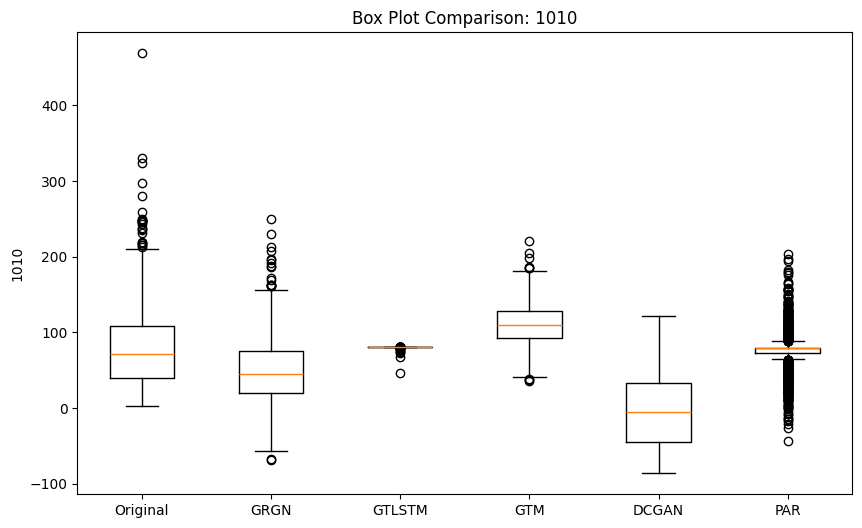

In [102]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('1010', ('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DCGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

/Users/paulmagos/Documents/TSGen/Notebooks/VisualEval.py:199: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


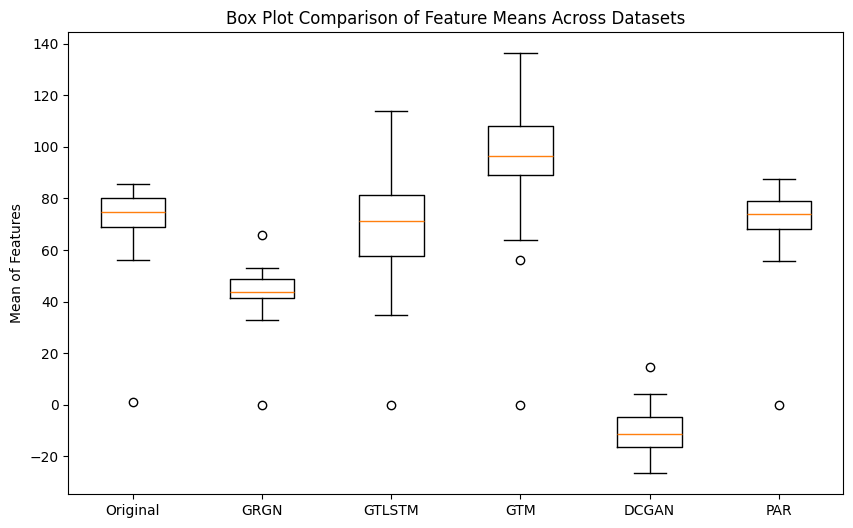

In [103]:
plot_boxplots_means(('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DCGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

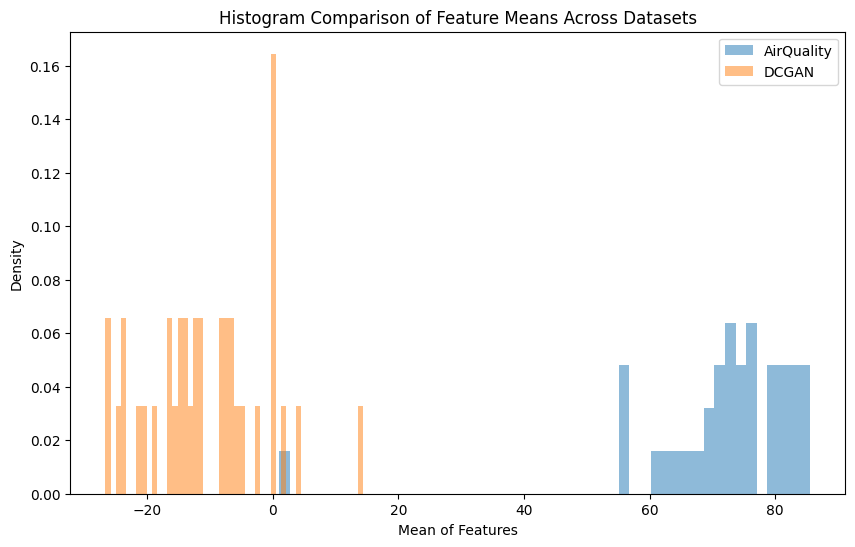

In [104]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                #    ('GRGN', syn_AirQuality_GRGN), 
                  #  ('GTLSTM', syn_PemsBay_GTLSTM), 
                #    ('GTM', syn_AirQuality_GTM),  
                   ('DCGAN', syn_AirQuality_dopple), 
                #    ('PAR', syn_AirQuality_PAR)
                   )

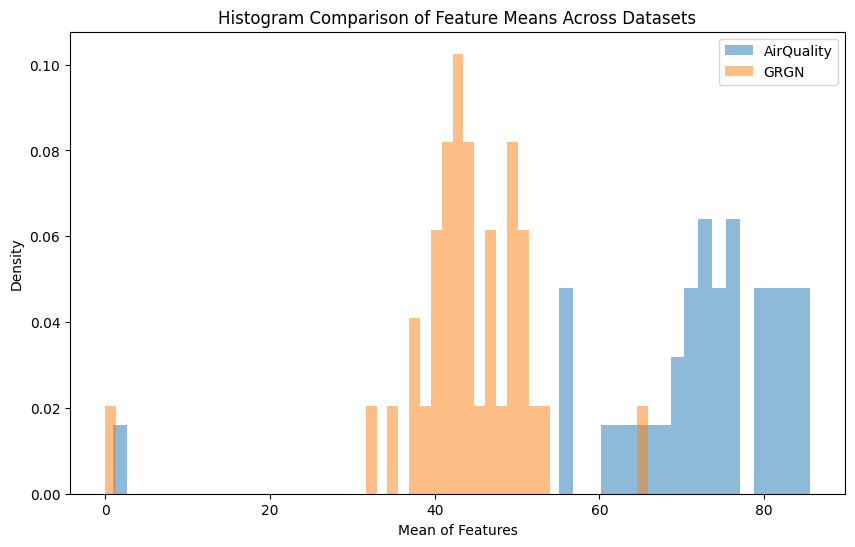

In [105]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                  #  ('GTLSTM', syn_PemsBay_GTLSTM), 
                  #  ('GTM', syn_PemsBay_GTM),  
                  #  ('DCGAN', syn_PemsBay_dopple), 
                  #  ('PAR', syn_AirQuality_PAR)
                   )